In [ ]:
import pandas as pd
!pip install wooldridge
import wooldridge
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 18.5 MB/s eta 0:00:00


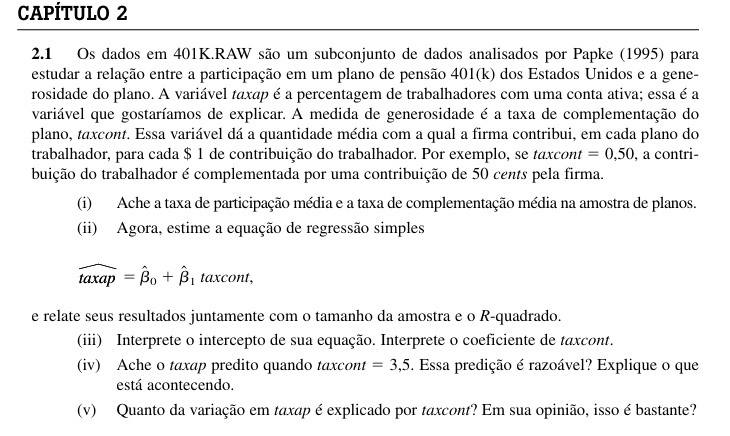

In [ ]:
k = wooldridge.data('401k')
k.head()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
0,26.100000,0.21,1653.0,6322.0,8,8709.0,0,9.072112
1,100.000000,1.42,262.0,262.0,6,315.0,1,5.752573
2,97.599998,0.91,166.0,170.0,10,275.0,1,5.616771
3,100.000000,0.42,257.0,257.0,7,500.0,0,6.214608
4,82.500000,0.53,591.0,716.0,28,933.0,1,6.838405


Plotando o gráfico

<Axes: xlabel='mrate', ylabel='prate'>

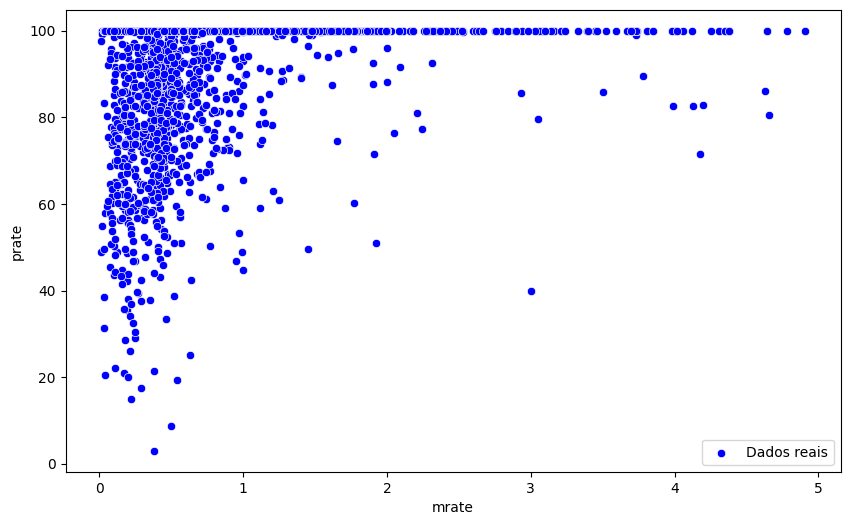

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=k.mrate, y=k.prate, color="blue", label="Dados reais")

(i) A taxa de participação média é de 87% e a de contribuição é de 0.73

In [ ]:
print(np.mean(k.prate))
print('\n', np.mean(k.mrate))

87.3629074562948

 0.7315123849943027


(ii) Temos uma amostra de 1534 pessoas, B0 = 83.0755 e B1 = 5.8611, além de um R^2 = 0.075

In [ ]:
import statsmodels.api as sm
Y = k.prate
X = k.mrate
X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
resumo = modelo.summary()
print(resumo)

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     123.7
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.10e-27
Time:                        19:17:44   Log-Likelihood:                -6437.0
No. Observations:                1534   AIC:                         1.288e+04
Df Residuals:                    1532   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.0755      0.563    147.484      0.0

Plotando novamente, porém agora com a regressão. Uma confirmação visual do R^2 muito baixo

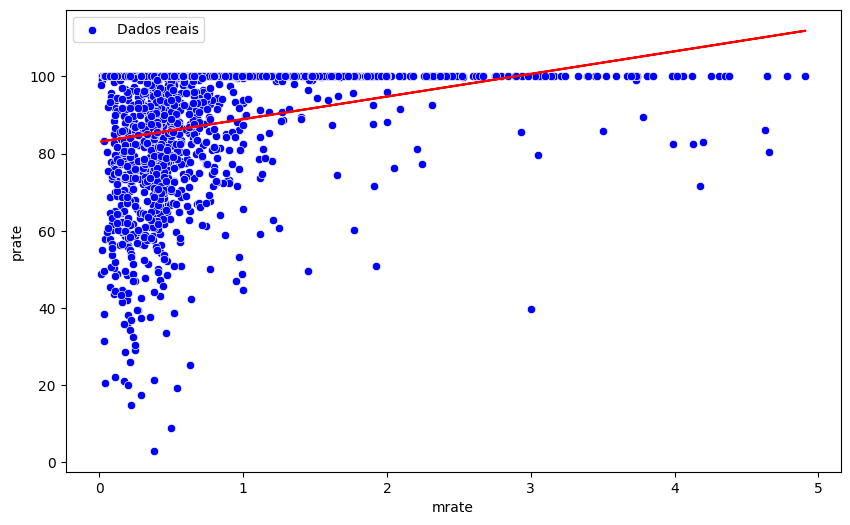

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=k.mrate, y=k.prate, color="blue", label="Dados reais")
predictions = modelo.predict(sm.add_constant(k.mrate))
plt.plot(k.mrate, predictions, color="red", label="Reta ajustada")

(iii) O intercepto em 83.07% indica que, independentemente da contribuição do patrão, essa quantidade de funcionários estará participando. Já o coeficiente de mrate indica o aumento em prate para cada dólar de contribuição (em torno de 6%)


(iv) Quando mrate = 3.5 teríamos mais de 100% dos funcionários participando, o que é um absurdo. Isso ocore pois o modelo é apenas uma reta, e esta possui valores correspondentes para qualquer input dado.

In [ ]:
modelo.predict(exog=pd.DataFrame({"const" : [1.0], "mrate" : [3.5]}))

,0
0,103.589233


Como R^2 = 0.075, temos que 7.5% de prate é explicado por mrate, o que é bem pouco.

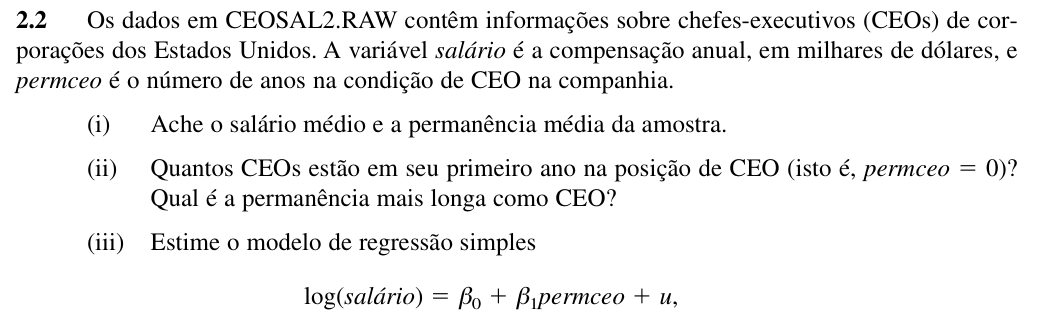

In [ ]:
ceosal2 = wooldridge.data('ceosal2')
ceosal2.head()

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,1161,49,1,1,9,2,6200.0,966,23200.0,7.057037,8.732305,10.051908,81,4,15.580646
1,600,43,1,1,10,10,283.0,48,1100.0,6.396930,5.645447,7.003066,100,100,16.961130
2,379,51,1,1,9,3,169.0,40,1100.0,5.937536,5.129899,7.003066,81,9,23.668638
3,651,55,1,0,22,22,1100.0,-54,1000.0,6.478509,7.003066,6.907755,484,484,-4.909091
4,497,44,1,1,8,6,351.0,28,387.0,6.208590,5.860786,5.958425,64,36,7.977208


(i) O salário médio é de 865k doláres/ano, enquato a média da permanência é de 7.95 anos

In [ ]:
print(np.mean(ceosal2.salary))
print(np.mean(ceosal2.ceoten))

865.8644067796611
7.954802259887006


(ii) Existem 5 CEO's no seu primeiro ano e o CEO com mais tempo no cargo esta a 37 anos.

In [ ]:
print(len(ceosal2.ceoten[ceosal2.ceoten == 0]))
print(max(ceosal2.ceoten))

5
37


(iii) O aumento percentual no salário, dado um ano a mais como CEO, é de aproximadamente 1% (B1)

In [ ]:
X = ceosal2.ceoten
Y = np.log(ceosal2.salary)
X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
resumo = modelo.summary()
print(resumo)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.334
Date:                Fri, 22 Nov 2024   Prob (F-statistic):              0.128
Time:                        20:08:58   Log-Likelihood:                -160.84
No. Observations:                 177   AIC:                             325.7
Df Residuals:                     175   BIC:                             332.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5055      0.068     95.682      0.0

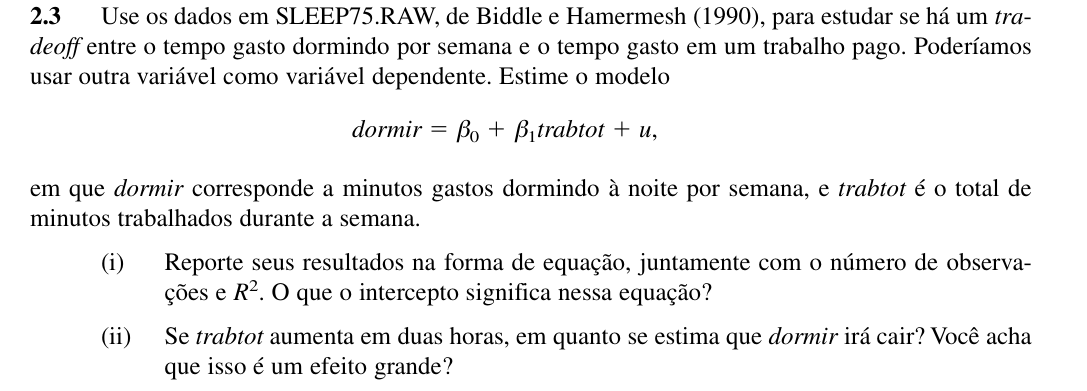

In [ ]:
sleep = wooldridge.data('sleep75')
sleep.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0.0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500.0,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500.0,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500.0,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500.0,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


(i) Temos um R^2 = 0.103. O intercepto = 3586.37, significa que a quantidade de minutos de sono, independentemente do quanto alguem trabalha, é de aproximadamente 8.5h por noite. Assim, quanto mais um individuo trabalha, menos ele dorme.

In [ ]:
Y = sleep.sleep
X = sleep.totwrk
X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
resumo = modelo.summary()
print(resumo)

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     81.09
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.99e-18
Time:                        20:16:31   Log-Likelihood:                -5267.1
No. Observations:                 706   AIC:                         1.054e+04
Df Residuals:                     704   BIC:                         1.055e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3586.3770     38.912     92.165      0.0

(ii) Caso aumente o trabalho em 2h, esperamos durma 18 minutos a menos. Não acho que seja uma grande diferença.

In [ ]:
2*60*modelo.params[1]

<ipython-input-40-dde7ed89c508>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  2*60*modelo.params[1]


-18.08949889427923

  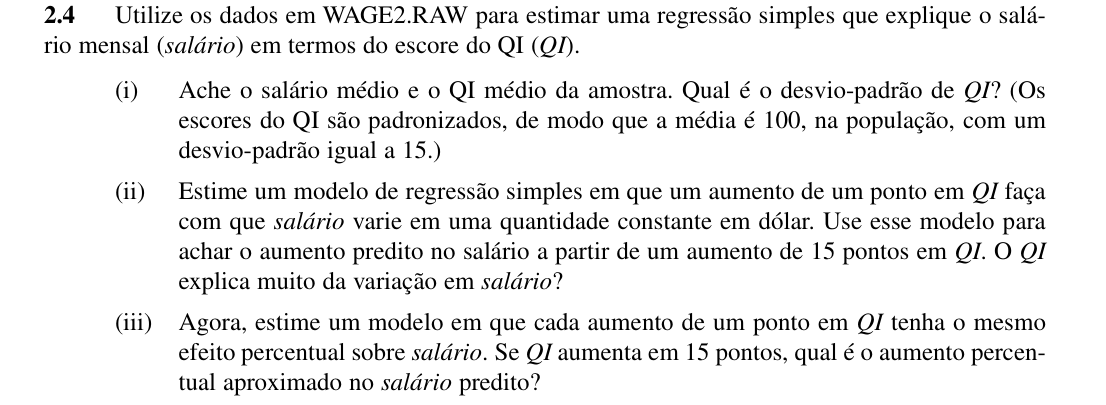

In [ ]:
wage = wooldridge.data('wage2')
wage.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502


(i) Percebe-se que os valores são próximos dos da população

In [ ]:
print(np.mean(wage.wage))
print(np.mean(wage.IQ))
print(np.std(wage.IQ))

957.9454545454546
101.28235294117647
15.044584678664528


(ii) Seria um aumento de $124, ele explica 10% da variação em salário

In [ ]:
Y = wage.wage
X = wage.IQ
X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
resumo = modelo.summary()
print(resumo)

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     98.55
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           3.79e-22
Time:                        20:32:51   Log-Likelihood:                -6891.4
No. Observations:                 935   AIC:                         1.379e+04
Df Residuals:                     933   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.9916     85.642      1.366      0.1

In [ ]:
15*modelo.params[1]

<ipython-input-51-ca1be4f9a832>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  15*modelo.params[1]


124.5459646235166

(iii) Um aumento de 15 pontos em QI corresponde a aproximadamente 13% de aumento no salário

In [ ]:
Y = wage.lwage
X = wage.IQ
X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
resumo = modelo.summary()
print(resumo)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     102.6
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           5.93e-23
Time:                        20:39:25   Log-Likelihood:                -468.85
No. Observations:                 935   AIC:                             941.7
Df Residuals:                     933   BIC:                             951.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8870      0.089     66.131      0.0

In [ ]:
15*modelo.params[1]

<ipython-input-53-ca1be4f9a832>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  15*modelo.params[1]


0.13210733653450668

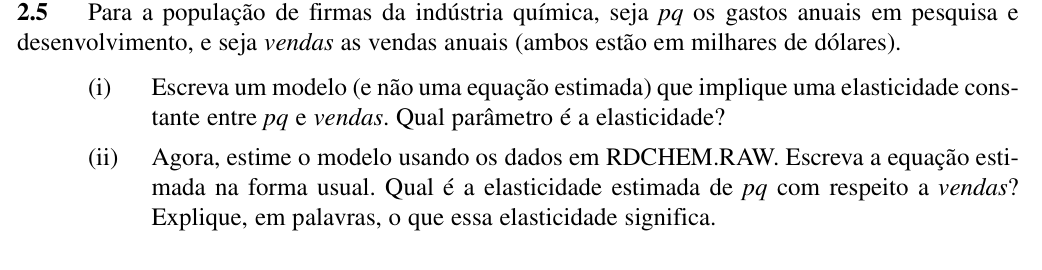

(i) Um modelo de elasticidade constante para esse caso seria a regressão linear porém com o log tanto em Y (pq) quanto em  X (vendas). A elasticidade seria B1

(ii) A elasticidade é de 1.0757. Significa que um aumento de 1% nas vendas implica em um aumento de 1.0757% nos gastos em pesquisa.

In [ ]:
rdchem = wooldridge.data('rdchem')
rdchem.head()

,rd,sales,profits,rdintens,profmarg,salessq,lsales,lrd
0,430.600006,4570.200195,186.899994,9.421906,4.089536,2.088673e+07,8.427312,6.065180
1,59.000000,2830.000000,467.000000,2.084806,16.501766,8.008900e+06,7.948032,4.077538
2,23.500000,596.799988,107.400002,3.937668,17.995979,3.561702e+05,6.391582,3.157000
3,3.500000,133.600006,-4.300000,2.619760,-3.218563,1.784896e+04,4.894850,1.252763
4,1.700000,42.000000,8.000000,4.047619,19.047619,1.764000e+03,3.737670,0.530628


In [ ]:
Y = rdchem.lrd
X = rdchem.lsales
X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
resumo = modelo.summary()
print(resumo)

                            OLS Regression Results                            
Dep. Variable:                    lrd   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     302.7
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           3.20e-17
Time:                        20:50:35   Log-Likelihood:                -24.021
No. Observations:                  32   AIC:                             52.04
Df Residuals:                      30   BIC:                             54.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1047      0.453     -9.066      0.0

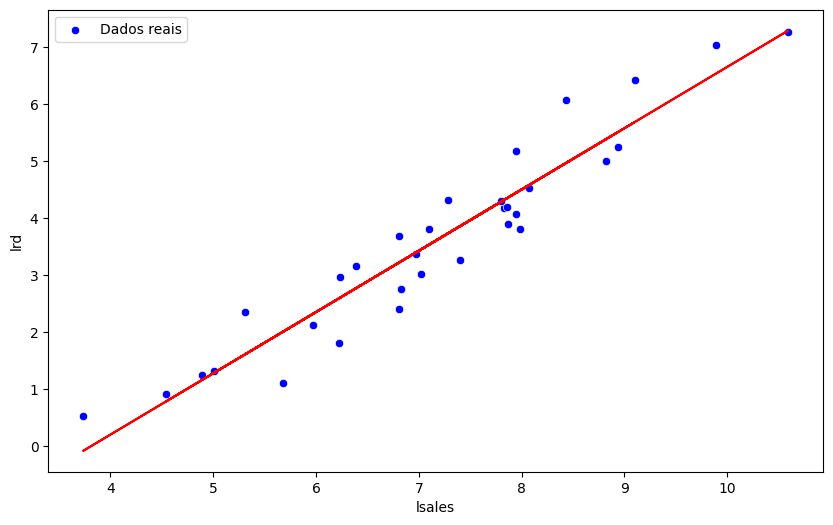

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rdchem.lsales, y=Y, color="blue", label="Dados reais")
predictions = modelo.predict(sm.add_constant(rdchem.lsales))
plt.plot(rdchem.lsales, predictions, color="red", label="Reta ajustada")

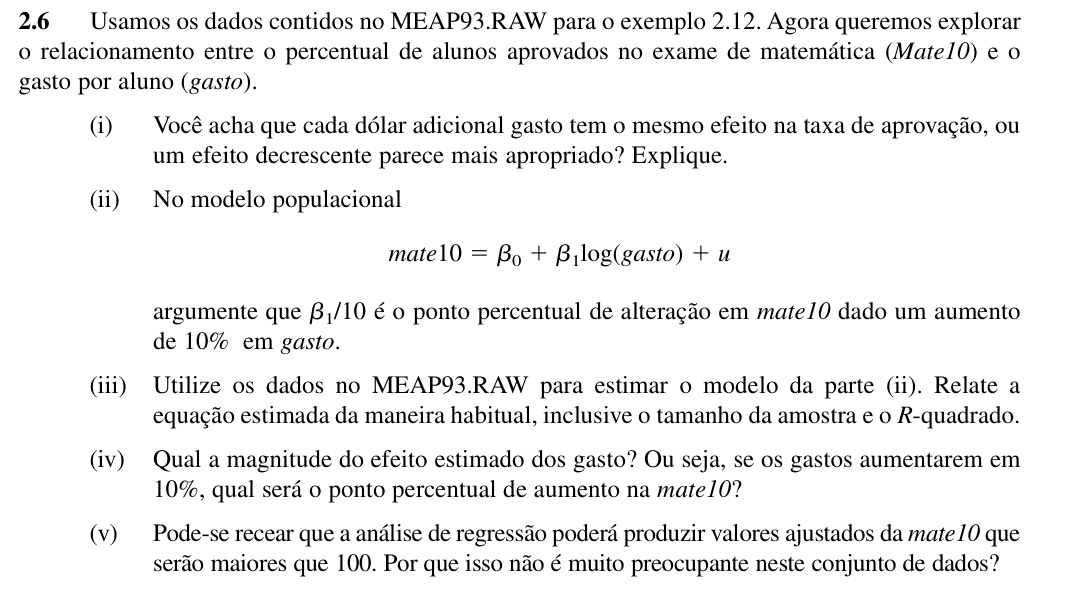

(i) Num primeiro momento, me parece que um aumento nos gastos produzirá um aumento na aprovação
(ii) Assim como B1/100 é a variação em 1 ponto percentual, B/10 é a variação em 10 pontos percentuais

(iii) Veja todas as informações na tabela. Nota-se um R^2 particularmente pequeno
(iv) Se os gastos aumentarem 10%, as notas em matemática aumentam em 1.1%

(v) Pois as notas em matemática não são muito altas, então seria necessário um gasto muito alto para que isso ocorresse.

In [ ]:
meap = wooldridge.data('meap93')
meap.head()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.4,1862,112.599998,5765,37498.0,7420,2.9,89.199997,56.400002,67.900002,44918.0,10.712594,8.659560,7.529407,4.723842,0.197877,10.532043
1,2.3,11355,101.199997,6601,48722.0,10370,1.3,91.400002,42.700001,65.300003,59092.0,10.986851,8.794976,9.337414,4.617099,0.212840,10.793886
2,2.7,7685,114.000000,6834,44541.0,7313,3.5,91.400002,43.799999,54.299999,51854.0,10.856188,8.829665,8.947025,4.736198,0.164186,10.704165
3,3.4,1148,85.400002,3586,31566.0,5989,3.6,86.599998,25.299999,60.000000,37555.0,10.533562,8.184793,7.045776,4.447346,0.189729,10.359836
4,3.4,1572,96.099998,3847,29781.0,5545,0.0,100.000000,15.300000,65.800003,35326.0,10.472375,8.255049,7.360104,4.565389,0.186193,10.301626


In [ ]:
Y = meap.math10
X = meap.lexpend
X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
resumo = modelo.summary()
print(resumo)

                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     12.41
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           0.000475
Time:                        21:01:35   Log-Likelihood:                -1531.4
No. Observations:                 408   AIC:                             3067.
Df Residuals:                     406   BIC:                             3075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.3411     26.530     -2.614      0.0

In [ ]:
print(max(meap.math10))

66.69999694824219


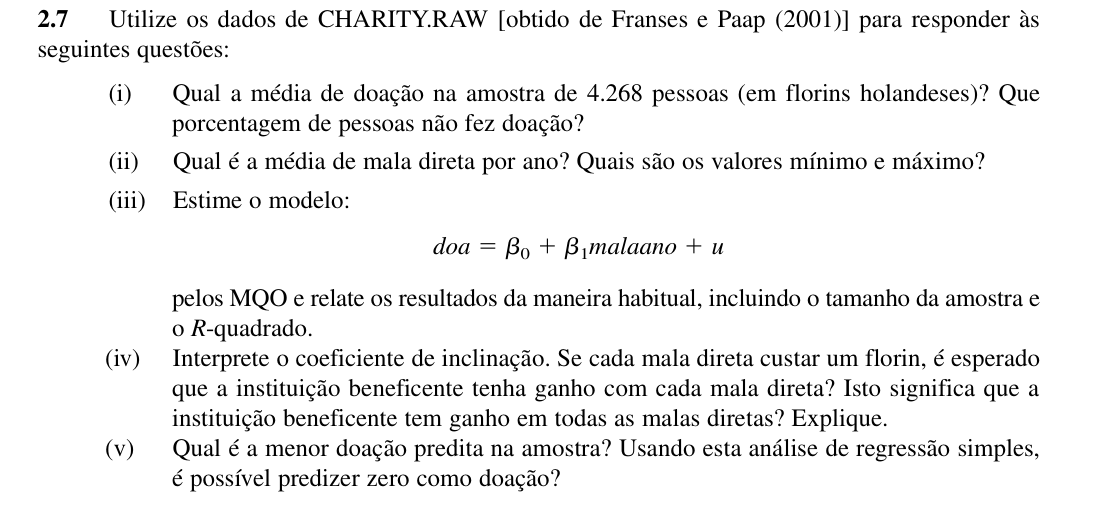

(i) Média de 7.4 florins por doação e 60% das pessoas não doaram nada.

In [ ]:
charity = wooldridge.data('charity')
charity.head()

,respond,gift,resplast,weekslast,propresp,mailsyear,giftlast,avggift
0,0,0,0,143.000000,0.3,2.5,10,10.0
1,0,0,0,65.428574,0.3,2.5,10,10.0
2,0,0,1,13.142858,0.3,2.5,10,10.0
3,0,0,0,120.142860,0.3,2.5,10,10.0
4,1,10,0,103.857140,0.2,2.5,10,10.0


In [ ]:
print(np.mean(charity.gift))

7.444470477975632


In [ ]:
print(len(charity.respond[charity.respond == 0])/len(charity.respond))

0.6000468603561387


(ii) Em média 2, com máximo de 3.5 e minimo de 0.25

In [ ]:
print(charity.mailsyear.mean())
print(charity.mailsyear.max())
print(charity.mailsyear.min())

2.0495548266166823
3.5
0.25


(iii) Segue

In [ ]:
Y = charity.gift
X = charity.mailsyear
X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
resumo = modelo.summary()
print(resumo)

                            OLS Regression Results                            
Dep. Variable:                   gift   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     59.65
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.40e-14
Time:                        21:18:29   Log-Likelihood:                -17602.
No. Observations:                4268   AIC:                         3.521e+04
Df Residuals:                    4266   BIC:                         3.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0141      0.739      2.724      0.0

(iv) B1 representao aumento médio das doações para cada correspondencia enviada. Nem sempre ela terá lucro, mas em média sim pois B1 é maior que 1, ou seja o aumento médio das doações para cada correspondencia enviada é maior que o custo da correspondencia.

(v) o menor valor predito é 2.67, isso ocorre pois não é possivel enviar correspondências negativas

In [ ]:
modelo.predict(X).min()

2.67646639818567